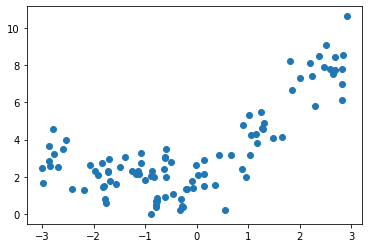

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(665)
x = np.random.uniform(-3.0, 3.0, size=100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

plt.scatter(x, y)
plt.show()

In [2]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.score(X,y)

0.5205622732917984

In [3]:
from sklearn.metrics import mean_squared_error
y_pred = lin_reg.predict(X)
mse = mean_squared_error(y_pred,y)
mse

2.8405751336914453

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

def PolynomialRegression(degree):
    pipeline = Pipeline([('poly',PolynomialFeatures(degree=degree)),('std',StandardScaler()),('lin_reg',LinearRegression())])
    return pipeline


In [5]:
poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X,y)
y2_pred=poly_reg.predict(X)
mean_squared_error(y,y2_pred)


1.0776727031710007

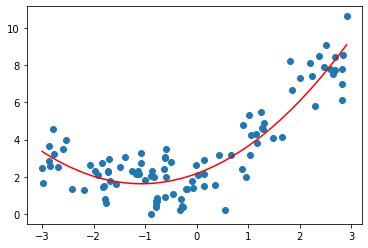

In [6]:
plt.scatter(X,y)
plt.plot(np.sort(x),y2_pred[np.argsort(x)], color='r')
plt.show()

In [7]:
poly_reg = PolynomialRegression(degree=10)
poly_reg.fit(X,y)
y3_pred=poly_reg.predict(X)
mean_squared_error(y,y3_pred)

0.8325024832464909

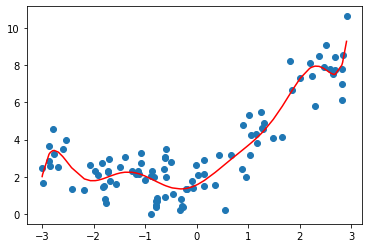

In [8]:
plt.scatter(X,y)
plt.plot(np.sort(x),y3_pred[np.argsort(x)], color='r')
plt.show()

In [9]:
from sklearn.model_selection import train_test_split,cross_val_score,cross_validate # 交叉验证所需的函数
from sklearn.model_selection import KFold,LeaveOneOut,LeavePOut,ShuffleSplit # 交叉验证所需的子集划分方法
from sklearn.model_selection import StratifiedKFold,StratifiedShuffleSplit # 分层分割
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut,LeavePGroupsOut,GroupShuffleSplit # 分组分割
from sklearn.model_selection import TimeSeriesSplit # 时间序列分割
from sklearn import datasets  # 自带数据集
from sklearn import svm  # SVM算法
from sklearn import preprocessing  # 预处理模块
from sklearn.metrics import recall_score  # 模型度量

iris = datasets.load_iris()  # 加载数据集
print('样本集大小：',iris.data.shape,iris.target.shape)

# ===================================数据集划分,训练模型==========================
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=0)  # 交叉验证划分训练集和测试集.test_size为测试集所占的比例
print('训练集大小：',X_train.shape,y_train.shape)  # 训练集样本大小
print('测试集大小：',X_test.shape,y_test.shape)  # 测试集样本大小
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train) # 使用训练集训练模型
print('准确率：',clf.score(X_test, y_test))  # 计算测试集的度量值（准确率）


#  如果涉及到归一化，则在测试集上也要使用训练集模型提取的归一化函数。
scaler = preprocessing.StandardScaler().fit(X_train)  # 通过训练集获得归一化函数模型。（也就是先减几，再除以几的函数）。在训练集和测试集上都使用这个归一化函数
X_train_transformed = scaler.transform(X_train)
clf = svm.SVC(kernel='linear', C=1).fit(X_train_transformed, y_train) # 使用训练集训练模型
X_test_transformed = scaler.transform(X_test)
print(clf.score(X_test_transformed, y_test))  # 计算测试集的度量值（准确度）

# ===================================直接调用交叉验证评估模型==========================
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, iris.data, iris.target, cv=5)  #cv为迭代次数。
print(scores)  # 打印输出每次迭代的度量值（准确度）
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))  # 获取置信区间。（也就是均值和方差）

# ===================================多种度量结果======================================
scoring = ['precision_macro', 'recall_macro'] # precision_macro为精度，recall_macro为召回率
scores = cross_validate(clf, iris.data, iris.target, scoring=scoring,cv=5, return_train_score=True)
sorted(scores.keys())
print('测试结果：',scores)  # scores类型为字典。包含训练得分，拟合次数， score-times （得分次数）


# ==================================K折交叉验证、留一交叉验证、留p交叉验证、随机排列交叉验证==========================================
# k折划分子集
kf = KFold(n_splits=2)
for train, test in kf.split(iris.data):
    print("k折划分：%s %s" % (train.shape, test.shape))
    break

# 留一划分子集
loo = LeaveOneOut()
for train, test in loo.split(iris.data):
    print("留一划分：%s %s" % (train.shape, test.shape))
    break

# 留p划分子集
lpo = LeavePOut(p=2)
for train, test in loo.split(iris.data):
    print("留p划分：%s %s" % (train.shape, test.shape))
    break

# 随机排列划分子集
ss = ShuffleSplit(n_splits=3, test_size=0.25,random_state=0)
for train_index, test_index in ss.split(iris.data):
    print("随机排列划分：%s %s" % (train.shape, test.shape))
    break

# ==================================分层K折交叉验证、分层随机交叉验证==========================================
skf = StratifiedKFold(n_splits=3)  #各个类别的比例大致和完整数据集中相同
for train, test in skf.split(iris.data, iris.target):
    print("分层K折划分：%s %s" % (train.shape, test.shape))
    break

skf = StratifiedShuffleSplit(n_splits=3)  # 划分中每个类的比例和完整数据集中的相同
for train, test in skf.split(iris.data, iris.target):
    print("分层随机划分：%s %s" % (train.shape, test.shape))
    break


# ==================================组 k-fold交叉验证、留一组交叉验证、留 P 组交叉验证、Group Shuffle Split==========================================
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]
# k折分组
gkf = GroupKFold(n_splits=3)  # 训练集和测试集属于不同的组
for train, test in gkf.split(X, y, groups=groups):
    print("组 k-fold分割：%s %s" % (train, test))

# 留一分组
logo = LeaveOneGroupOut()
for train, test in logo.split(X, y, groups=groups):
    print("留一组分割：%s %s" % (train, test))

# 留p分组
lpgo = LeavePGroupsOut(n_groups=2)
for train, test in lpgo.split(X, y, groups=groups):
    print("留 P 组分割：%s %s" % (train, test))

# 随机分组
gss = GroupShuffleSplit(n_splits=4, test_size=0.5, random_state=0)
for train, test in gss.split(X, y, groups=groups):
    print("随机分割：%s %s" % (train, test))


# ==================================时间序列分割==========================================
tscv = TimeSeriesSplit(n_splits=3)
TimeSeriesSplit(max_train_size=None, n_splits=3)
for train, test in tscv.split(iris.data):
    print("时间序列分割：%s %s" % (train, test))

样本集大小： (150, 4) (150,)
训练集大小： (90, 4) (90,)
测试集大小： (60, 4) (60,)
准确率： 0.9666666666666667
0.9333333333333333
[0.96666667 1.         0.96666667 0.96666667 1.        ]
Accuracy: 0.98 (+/- 0.03)
测试结果： {'fit_time': array([0.0004549 , 0.00037599, 0.00032926, 0.00037885, 0.00035501]), 'score_time': array([0.00092912, 0.00077415, 0.00072789, 0.00075102, 0.00072408]), 'test_precision_macro': array([0.96969697, 1.        , 0.96969697, 0.96969697, 1.        ]), 'train_precision_macro': array([0.97674419, 0.97674419, 0.99186992, 0.98412698, 0.98333333]), 'test_recall_macro': array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ]), 'train_recall_macro': array([0.975     , 0.975     , 0.99166667, 0.98333333, 0.98333333])}
k折划分：(75,) (75,)
留一划分：(149,) (1,)
留p划分：(149,) (1,)
随机排列划分：(149,) (1,)
分层K折划分：(100,) (50,)
分层随机划分：(135,) (15,)
组 k-fold分割：[0 1 2 3 4 5] [6 7 8 9]
组 k-fold分割：[0 1 2 6 7 8 9] [3 4 5]
组 k-fold分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[3 4 5 6 7 8 9] [0 1 2]
留一组分割：[0 1 2 6 7 8 9] [3 

In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#把要调整的参数以及其候选值 列出来；
param_grid = {"gamma":[0.001,0.01,0.1,1,10,100],
             "C":[0.001,0.01,0.1,1,10,100]}
print("Parameters:{}".format(param_grid))

grid_search = GridSearchCV(SVC(),param_grid,cv=5) #实例化一个GridSearchCV类
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,random_state=10)
grid_search.fit(X_train,y_train) #训练，找到最优的参数，同时使用最优的参数实例化一个新的SVC estimator。
print("Test set score:{:.2f}".format(grid_search.score(X_test,y_test)))
print("Best parameters:{}".format(grid_search.best_params_))
print("Best score on train set:{:.2f}".format(grid_search.best_score_))

Parameters:{'gamma': [0.001, 0.01, 0.1, 1, 10, 100], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}
Test set score:0.97
Best parameters:{'C': 10, 'gamma': 0.1}
Best score on train set:0.98


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression  #线性回归
from sklearn.neighbors import KNeighborsRegressor  #K近邻回归
from sklearn.tree import DecisionTreeRegressor     #决策树回归
from sklearn.ensemble import RandomForestRegressor #随机森林回归
from sklearn.svm import SVR  #支持向量回归
# import lightgbm as lgb #lightGbm模型

from sklearn.model_selection import train_test_split # 切分数据
from sklearn.metrics import mean_squared_error #评价指标

from sklearn.linear_model import SGDRegressor

In [12]:
train_data_file = "./zhengqi_train.txt"
test_data_file =  "./zhengqi_test.txt"

train_data = pd.read_csv(train_data_file, sep='\t', encoding='utf-8')
test_data = pd.read_csv(test_data_file, sep='\t', encoding='utf-8')
from sklearn import preprocessing 

features_columns = [col for col in train_data.columns if col not in ['target']]

min_max_scaler = preprocessing.MinMaxScaler()

min_max_scaler = min_max_scaler.fit(train_data[features_columns])

train_data_scaler = min_max_scaler.transform(train_data[features_columns])
test_data_scaler = min_max_scaler.transform(test_data[features_columns])

train_data_scaler = pd.DataFrame(train_data_scaler)
train_data_scaler.columns = features_columns

test_data_scaler = pd.DataFrame(test_data_scaler)
test_data_scaler.columns = features_columns

train_data_scaler['target'] = train_data['target']

from sklearn.decomposition import PCA   #主成分分析法

#PCA方法降维
#保留16个主成分
pca = PCA(n_components=16)
new_train_pca_16 = pca.fit_transform(train_data_scaler.iloc[:,0:-1])
new_test_pca_16 = pca.transform(test_data_scaler)
new_train_pca_16 = pd.DataFrame(new_train_pca_16)
new_test_pca_16 = pd.DataFrame(new_test_pca_16)
new_train_pca_16['target'] = train_data_scaler['target']

#采用 pca 保留16维特征的数据
new_train_pca_16 = new_train_pca_16.fillna(0)
train = new_train_pca_16[new_test_pca_16.columns]
target = new_train_pca_16['target']

# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=2)

In [13]:
clf = SGDRegressor(max_iter=500, tol=1e-2) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.15443431241141145
SGDRegressor test MSE:    0.14480310236128918


In [14]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13676646330452374
SGDRegressor test MSE:    0.1403611331748016


In [15]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.1364231063048835
SGDRegressor test MSE:    0.13743516561077707


In [16]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L2', alpha=0.0001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13593246646394913
SGDRegressor test MSE:    0.13727728550249282


In [17]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'L1', alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13593792783677405
SGDRegressor test MSE:    0.13775107399788128


In [18]:
poly = PolynomialFeatures(3)
train_data_poly = poly.fit_transform(train_data)
test_data_poly = poly.transform(test_data)
clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty= 'elasticnet', l1_ratio=0.9, alpha=0.00001) 
clf.fit(train_data_poly, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data_poly))
score_test = mean_squared_error(test_target, clf.predict(test_data_poly))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.13600583978225972
SGDRegressor test MSE:    0.13727750933450117


In [19]:
# 简单交叉验证
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

clf = SGDRegressor(max_iter=1000, tol=1e-3) 
clf.fit(train_data, train_target)
score_train = mean_squared_error(train_target, clf.predict(train_data))
score_test = mean_squared_error(test_target, clf.predict(test_data))
print("SGDRegressor train MSE:   ", score_train)
print("SGDRegressor test MSE:   ", score_test)

SGDRegressor train MSE:    0.141544942096129
SGDRegressor test MSE:    0.14699106724683195


In [20]:
# 5折交叉验证
from sklearn.model_selection import KFold

kf = KFold(n_splits=5)
for k, (train_index, test_index) in enumerate(kf.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 折", "SGDRegressor train MSE:   ", score_train)
    print(k, " 折", "SGDRegressor test MSE:   ", score_test, '\n')  

0  折 SGDRegressor train MSE:    0.15080841215809093
0  折 SGDRegressor test MSE:    0.10660676111541345 

1  折 SGDRegressor train MSE:    0.13358222290870375
1  折 SGDRegressor test MSE:    0.1820143000113673 

2  折 SGDRegressor train MSE:    0.14708176654193053
2  折 SGDRegressor test MSE:    0.13344053979146958 

3  折 SGDRegressor train MSE:    0.14074838488282057
3  折 SGDRegressor test MSE:    0.16248759415516986 

4  折 SGDRegressor train MSE:    0.13891402176549256
4  折 SGDRegressor test MSE:    0.16533366221203075 



In [21]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
num = 100
for k, (train_index, test_index) in enumerate(loo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  个 SGDRegressor train MSE:    0.14164169978398936
0  个 SGDRegressor test MSE:    0.011221323447489318 

1  个 SGDRegressor train MSE:    0.14167904642950027
1  个 SGDRegressor test MSE:    0.12847624991369655 

2  个 SGDRegressor train MSE:    0.14163411238072965
2  个 SGDRegressor test MSE:    0.03706575537766993 

3  个 SGDRegressor train MSE:    0.1416128844125048
3  个 SGDRegressor test MSE:    0.003854589650180477 

4  个 SGDRegressor train MSE:    0.14157245157871956
4  个 SGDRegressor test MSE:    0.01197024751926946 

5  个 SGDRegressor train MSE:    0.1414718226549576
5  个 SGDRegressor test MSE:    0.13592943359144274 

6  个 SGDRegressor train MSE:    0.1409582830366112
6  个 SGDRegressor test MSE:    0.02759063388229691 

7  个 SGDRegressor train MSE:    0.1415803502748526
7  个 SGDRegressor test MSE:    0.0005208492765205183 

8  个 SGDRegressor train MSE:    0.14167501478844902
8  个 SGDRegressor test MSE:    0.09344237767790091 

9  个 SGDRegressor train MSE:    0.1416999880978707
9  个

In [22]:
from sklearn.model_selection import LeavePOut
lpo = LeavePOut(p=10)
num = 100
for k, (train_index, test_index) in enumerate(lpo.split(train)):
    train_data,test_data,train_target,test_target = train.values[train_index],train.values[test_index],target[train_index],target[test_index]
    clf = SGDRegressor(max_iter=1000, tol=1e-3) 
    clf.fit(train_data, train_target)
    score_train = mean_squared_error(train_target, clf.predict(train_data))
    score_test = mean_squared_error(test_target, clf.predict(test_data))
    print(k, " 10个", "SGDRegressor train MSE:   ", score_train)
    print(k, " 10个", "SGDRegressor test MSE:   ", score_test, '\n') 
    if k >= 9:
        break

0  10个 SGDRegressor train MSE:    0.1418855833918637
0  10个 SGDRegressor test MSE:    0.049362438109425304 

1  10个 SGDRegressor train MSE:    0.14198486382335604
1  10个 SGDRegressor test MSE:    0.04509059646477653 

2  10个 SGDRegressor train MSE:    0.14203157486879187
2  10个 SGDRegressor test MSE:    0.04634268945252061 

3  10个 SGDRegressor train MSE:    0.14185192263811883
3  10个 SGDRegressor test MSE:    0.054396950239036734 

4  10个 SGDRegressor train MSE:    0.14198172507336237
4  10个 SGDRegressor test MSE:    0.06946596818629316 

5  10个 SGDRegressor train MSE:    0.142032295529273
5  10个 SGDRegressor test MSE:    0.04497444659933935 

6  10个 SGDRegressor train MSE:    0.1418790198431703
6  10个 SGDRegressor test MSE:    0.049586021734455574 

7  10个 SGDRegressor train MSE:    0.14183379993975978
7  10个 SGDRegressor test MSE:    0.0534379164174284 

8  10个 SGDRegressor train MSE:    0.1420155770682504
8  10个 SGDRegressor test MSE:    0.04785145036409112 

9  10个 SGDRegressor tr

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200],
              'max_depth':[1, 2, 3]
        }


clf = GridSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor GridSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor GridSearchCV test MSE:    0.2643026655940186


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # 切分数据
# 切分数据 训练数据80% 验证数据20%
train_data,test_data,train_target,test_target=train_test_split(train,target,test_size=0.2,random_state=0)

randomForestRegressor = RandomForestRegressor()
parameters = {
              'n_estimators':[50, 100, 200, 300],
              'max_depth':[1, 2, 3, 4, 5]
        }


clf = RandomizedSearchCV(randomForestRegressor, parameters, cv=5)
clf.fit(train_data, train_target)

score_test = mean_squared_error(test_target, clf.predict(test_data))

print("RandomForestRegressor RandomizedSearchCV test MSE:   ", score_test)
sorted(clf.cv_results_.keys())

RandomForestRegressor RandomizedSearchCV test MSE:    0.19623086423567015


['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']